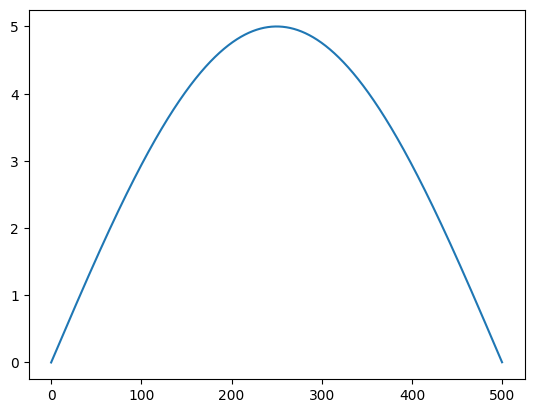

In [122]:
import numpy as np
import matplotlib.pyplot as plt



L = 500  # 測定幅
DELTA = 0.1  # サンプリング周期
A = 5

x = np.arange(0, L, DELTA)
z = A * np.sin(x / L  * np.pi)

plt.plot(x, z)

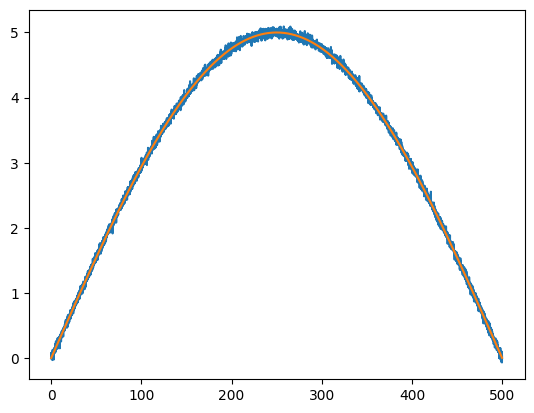

In [123]:
n = np.random.normal(
    loc=0,
    scale=0.1/np.sqrt(2*np.pi),
    size=x.shape[0]
)
z2 = z + n
#z3 = np.convolve(z2, 100, mode="full") 
plt.plot(x, z2)
plt.plot(x, z)

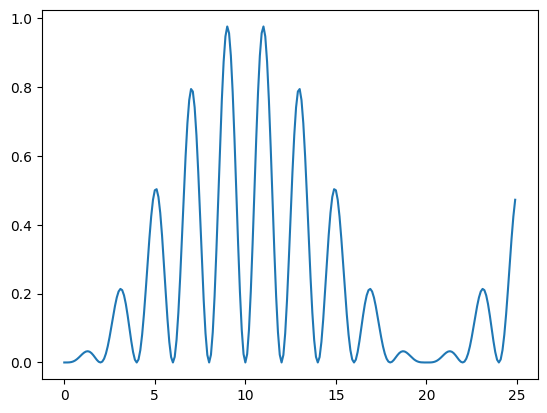

In [124]:
Lh = 0.5
Lw = 2
omega = L / Lw

s = -Lh/2 * (np.cos(x/L * 2*np.pi * omega) - 1) * \
    -(np.cos(x/L * 2*np.pi * omega/10) - 1)


plt.plot(x[:250], s[:250])

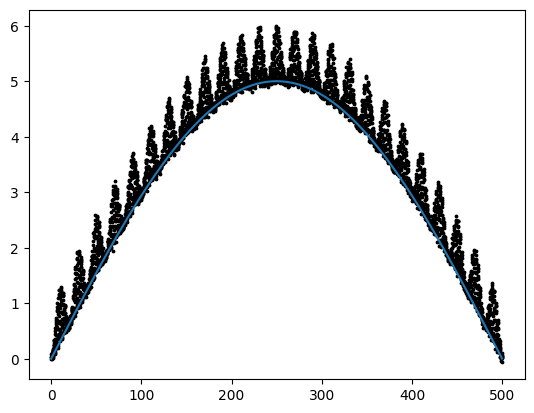

In [125]:
z3 = z + n + s
plt.scatter(x, z3, s=3, c="k")
plt.plot(x, z)

In [126]:
print("main = ", (L / np.pi)/(2*np.pi))

main =  25.330295910584447


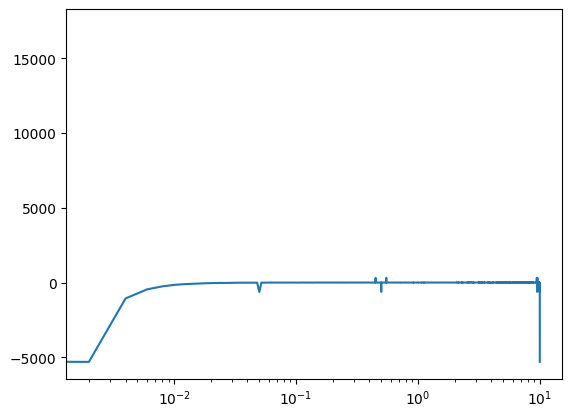

In [127]:
N = x.shape[0]  # データ数
freq = np.linspace(0, 1/DELTA, N)
F = np.fft.fft(z3)

F2 = F.copy()

plt.plot(freq, F)
plt.xscale("log")

(9.9, 10.0)

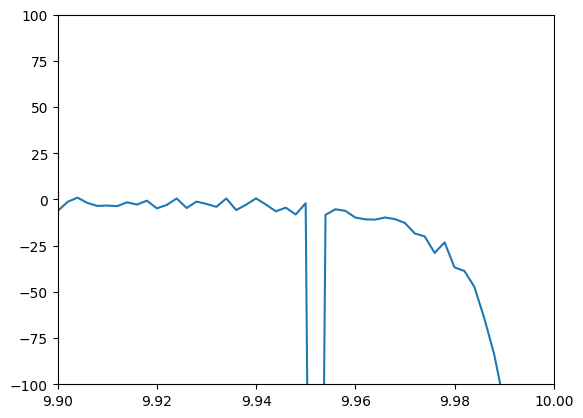

In [128]:
plt.plot(freq, F)
plt.ylim(-100, 100)
plt.xlim(9.9, 10)
#plt.xscale("log")

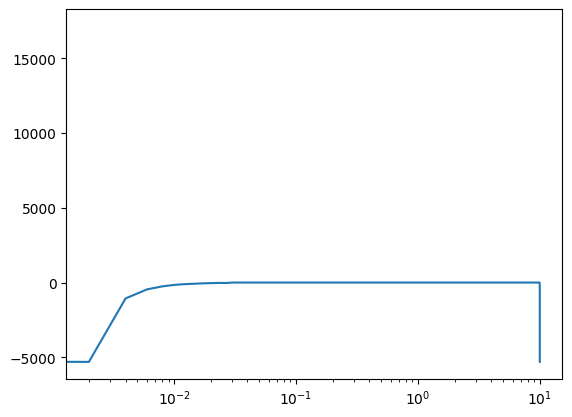

In [129]:
F2[(freq > 0.03) & (freq < 9.6)] = 0
F2[(freq > 9.94) & (freq < 9.96)] = 0
plt.plot(freq, F2)
plt.xscale("log")

(9.0, 10.0)

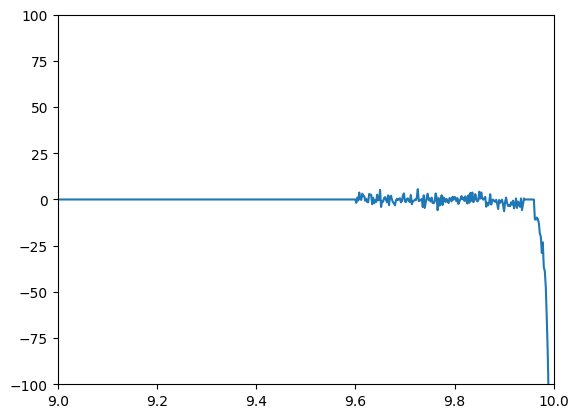

In [130]:
plt.plot(freq, F2)
plt.ylim(-100, 100)
plt.xlim(9, 10)
#plt.xscale("log")

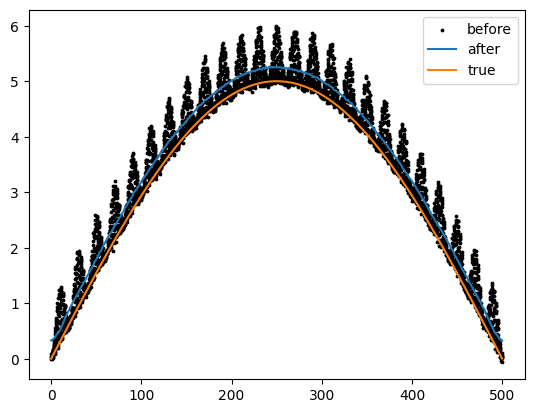

In [131]:
zz = np.fft.ifft(F2).real

plt.scatter(x, z3, label="before", c="k", s=3)
plt.plot(x, zz, label="after")
plt.plot(x, z, label="true")
plt.legend()

#plt.xlim(100, 110)


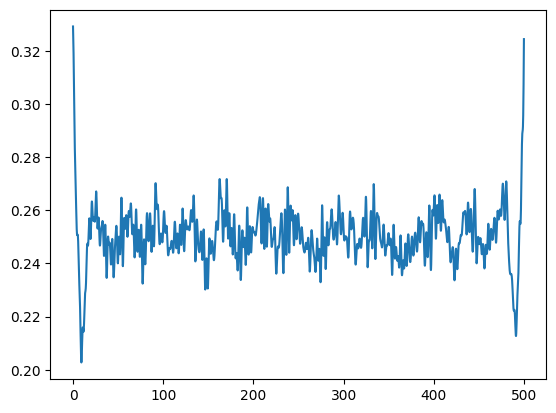

In [132]:
plt.plot(x, zz-z)